In [1]:
# libraries need for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

In [70]:
# To launch web page using chromedrive
service=Service()
options=webdriver.ChromeOptions()
driver=webdriver.Chrome(service=service, options=options)
driver.get("https://www.youtube.com/feed/trending?bp=4gIKGgh0cmFpbGVycw%3D%3D")


In [71]:
# To count total Number of popular youtube videos for movies
items=driver.find_elements(By.TAG_NAME, "ytd-video-renderer")
count_of_divs = len(items)
total_videos=count_of_divs
print(total_videos)


30


In [73]:
# Web scraping using selenium 
# this function locates all elements to fetch string values for corresponding element on web page
def parse_videos(item,n,m):
    # videoLink=items[0].find_element(By.ID, "video-title")
    title=item.find_element(By.ID, "video-title").get_attribute('title')
    url=item.find_element(By.ID, "video-title").get_attribute('href')
    channels=item.find_elements(By.XPATH,"//a[@class='yt-simple-endpoint style-scope yt-formatted-string'][1]")
    for channel in channels[:1]:
        channel=channels[m].text
    total_views=item.find_elements(By.XPATH,
    "//span[@class='inline-metadata-item style-scope ytd-video-meta-block'][1]")
    for view in total_views[:1]:
        views=total_views[n].text
    uploaded_time=item.find_elements(By.XPATH,
    "//span[@class='inline-metadata-item style-scope ytd-video-meta-block'][2]")
    for t in uploaded_time[:1]:
        time=uploaded_time[n].text
    description=item.find_element(By.ID,"description-text").text
    return {
    'TITLE': title,
    'URL': url,
    'Channel': channel,
    'TOTAL_VIEWS' : views,
    'UPLOADED_TIME': time,
    'DESCRIPTION' : description
     }
  


In [74]:
# code to parse through all the popular videos on youtube page and fetching corresponding values by using above function for total number of fetched videos
n=0
m=0
for item in items:
    videos_data=parse_videos(item,n,m)
    # To store data into dataframe
    videos_df=pd.DataFrame(videos_data,index=[n])
    #To store data into csv file
    if(n==0):
        videos_df.to_csv('trendingVideos.csv', mode='a', index=False, header=True)
    else:
        videos_df.to_csv('trendingVideos.csv', mode='a', index=False, header=False)
    n=n+1
    m=m+2
    


In [2]:
# To read csv file
df=pd.read_csv('trendingVideos.csv')

In [3]:
# To select top 30 rows of data
df.head(30)


,TITLE,URL,Channel,TOTAL_VIEWS,UPLOADED_TIME,DESCRIPTION
0,ANIMAL (OFFICIAL TRAILER): Ranbir Kapoor | Ras...,https://www.youtube.com/watch?v=8FkLRUJj-o0,T-Series,90M views,12 days ago,"THE ANIMAL, YOU HAVE NEVER SEEN BEFORE! PRESEN..."
1,The Boys – Season 4 Official Teaser Trailer | ...,https://www.youtube.com/watch?v=F9U-yoJbgWs,Prime Video,8.9M views,3 days ago,The world is on the brink. Victoria Neuman is ...
2,Godzilla x Kong : The New Empire | Official Tr...,https://www.youtube.com/watch?v=lV1OOlGwExM,Warner Bros. Pictures,12M views,2 days ago,Witness the rise of a new empire. #GodzillaXKo...
3,Salaar Hindi Trailer | Prabhas | Prashanth Nee...,https://www.youtube.com/watch?v=HihakYi5M2I,Hombale Films,64M views,4 days ago,Please…I…Kindly…Request!🔥 Presenting the Trail...
4,Lady Ballers | Official Trailer,https://www.youtube.com/watch?v=Py2MzGtmaJ0,DailyWire+,14M views,8 days ago,In a world where women’s sports is being trans...
5,Inside Out 2 | Teaser Trailer,https://www.youtube.com/watch?v=VWavstJydZU,Pixar,16M views,3 weeks ago,🚧Things are getting messy🚧 Disney and Pixar's ...
6,Avatar: The Last Airbender | Official Teaser |...,https://www.youtube.com/watch?v=waJKJW_XU90,Netflix,17M views,3 weeks ago,Always remember who you are… The four nations ...
7,Halo The Series | Season 2 First Look Trailer ...,https://www.youtube.com/watch?v=pfiTJ2JNDco,Paramount Plus,4M views,3 days ago,They will be remembered. #HaloTheSeries return...
8,MADAME WEB – Official Trailer (HD),https://www.youtube.com/watch?v=s_76M4c4LTo,Sony Pictures Entertainment,19M views,2 weeks ago,Her web connects them all. 🕸 #MadameWeb is com...
9,ted | Official Trailer | Peacock Original,https://www.youtube.com/watch?v=aq2Vt7OvQG0,Peacock,1.8M views,6 days ago,ted is streaming January 11th on Peacock: http...


In [4]:
# To convert string values of views into integer values, to make quantitative variables
def make_int_time(string):
    if 'day' in string:
        string = string.split(' ')[0]
        return float(string)
    if 'week' in string:
        string = string.split(' ')[0]
        return float(string)*7
    if 'month' in string:
        string = string.split(' ')[0]
        return float(string)*30
    if 'hour' in string:
        string = string.split(' ')[0]
        return float(string)/24

In [5]:
def make_int_views(string):
    if 'K' in string:
        string = string.split(' ')[0].replace("K","")
        return float(string)*1000
    if 'M' in string:
        string = string.split(' ')[0].replace("M","")
        return float(string)*1000000

In [6]:
# To split Title name only from full Title mentioned on youtube with some extra details
def first_title(string):
    from nltk.tokenize import RegexpTokenizer 
    tokenizer = RegexpTokenizer(r'([A-Za-z0-9 ]+)')
    titlenew = tokenizer.tokenize(string)
    titlenewv=titlenew[0]
    return titlenewv

In [7]:
# To convert string values of uploaded time for videos into integer values, to make quantitative variables
def make_time_split(string):
    if 'day' in string:
        return "days"
    if 'week' in string:
        return "weeks"
    if 'month' in string:
        return "months"
    if 'hour' in string:
        return "years"

In [8]:
# To create 4 extra tables 2 for making quatitative variables, 3rd for spliting only uploaded approx time in string such as weeks, hours, years, or months ago
df['Total_views_int'] = df['TOTAL_VIEWS'].apply(lambda x: make_int_views(x))
df['uploaded_time_int'] = df['UPLOADED_TIME'].apply(lambda x: make_int_time(x))
df['time_string'] = df['UPLOADED_TIME'].apply(lambda x: make_time_split(x))
df['Title']=df['TITLE'].apply(lambda x: first_title(x))

In [9]:
# fetch top 5 movies with highest views after sorting dataframe in descending order
df_sorted=df.sort_values(by='Total_views_int', ascending=False, inplace=False)
df_sorted.head(5)

,TITLE,URL,Channel,TOTAL_VIEWS,UPLOADED_TIME,DESCRIPTION,Total_views_int,uploaded_time_int,time_string,Title
0,ANIMAL (OFFICIAL TRAILER): Ranbir Kapoor | Ras...,https://www.youtube.com/watch?v=8FkLRUJj-o0,T-Series,90M views,12 days ago,"THE ANIMAL, YOU HAVE NEVER SEEN BEFORE! PRESEN...",90000000.0,12.0,days,ANIMAL
3,Salaar Hindi Trailer | Prabhas | Prashanth Nee...,https://www.youtube.com/watch?v=HihakYi5M2I,Hombale Films,64M views,4 days ago,Please…I…Kindly…Request!🔥 Presenting the Trail...,64000000.0,4.0,days,Salaar Hindi Trailer
19,Dunki Drop 1 | Shah Rukh Khan | Rajkumar Hiran...,https://www.youtube.com/watch?v=LOzucm1jbzs,Red Chillies Entertainment,51M views,1 month ago,Get ready to embark on this emotional rollerco...,51000000.0,30.0,months,Dunki Drop 1
26,Samबहादुर - Official Trailer | Vicky Kaushal |...,https://www.youtube.com/watch?v=6xJptj7AVSA,RSVP Movies,41M views,4 weeks ago,"To the Indian army, to the nation and its peop...",41000000.0,28.0,weeks,Sam
22,GHOSTBUSTERS: FROZEN EMPIRE - Official Teaser ...,https://www.youtube.com/watch?v=wFNK_KEmcWs,Ghostbusters,20M views,3 weeks ago,It'll send a chill down your spine. Watch the ...,20000000.0,21.0,weeks,GHOSTBUSTERS


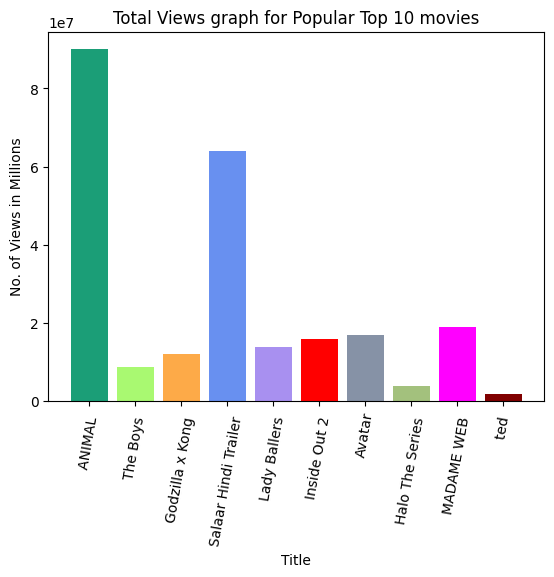

In [10]:
#To create bar chart which represents Number of views for Top 10 popular movies on youtube
df1=df.head(10)
title=df1['Title'] 
view=df1['Total_views_int']

# Plotting the bar graph
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0','#ff0000', '#8692a6', '#a3c17d','#FF00FF','#800000']
plt.bar(title, view, color=colors)

# Customize the plot
plt.xlabel('Title')
plt.ylabel('No. of Views in Millions')
plt.title('Total Views graph for Popular Top 10 movies')
plt.xticks(rotation=80)
# Show the plot
plt.show()

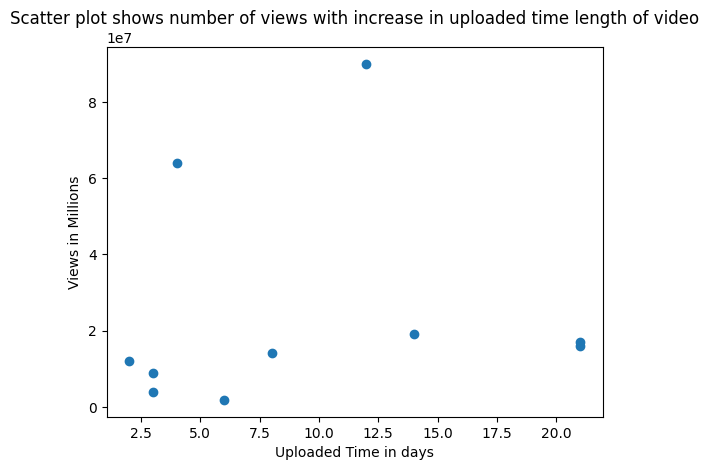

In [11]:
# Following chart expalains the relation with number of views with uploaded time of video
df1=df.head(10)
y=df1['Total_views_int'] 
x=df1['uploaded_time_int']
# Area plot
plt.scatter(x, y)
plt.ylabel('Views in Millions')
plt.xlabel('Uploaded Time in days')
plt.title('Scatter plot shows number of views with increase in uploaded time length of video')
plt.show()

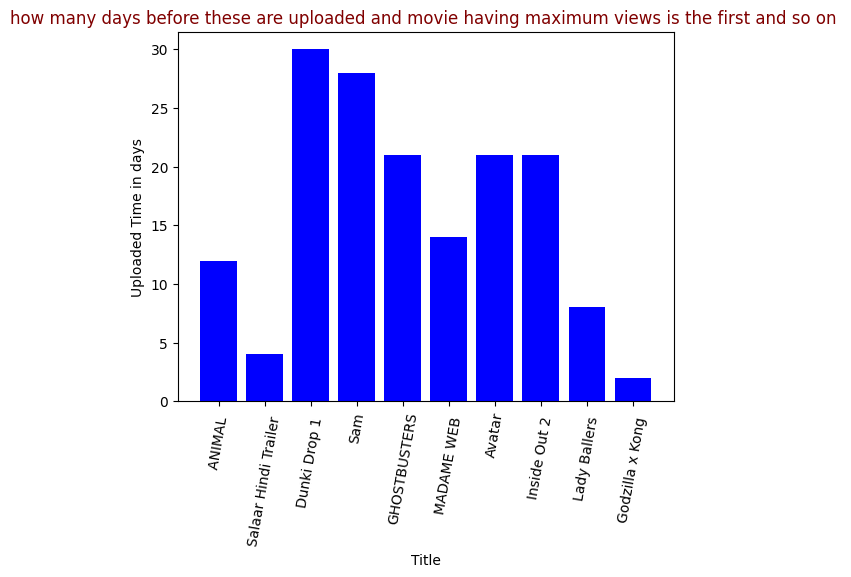

In [12]:
# bar graph shows top 10 youtube movies uploaded time means how many days before these are uploaded but after sorted data in desceding order of total views to each movie. 
from colorama import Fore, Back, Style
df1=df_sorted.head(10)
title=df1['Title'] 
time=df1['uploaded_time_int']

# Plotting the bar graph
plt.bar(title, time, color='blue')

# Customize the plot
plt.xlabel('Title')
plt.ylabel('Uploaded Time in days')
plt.title('how many days before these are uploaded and movie having maximum views is the first and so on ', color='maroon')
plt.xticks(rotation=80)
# Show the plot
plt.show()

In [13]:
df_grouped = df.groupby(['time_string']).count()

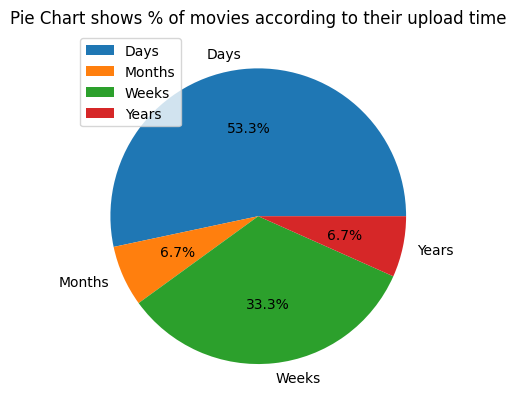

In [14]:
# Pie chart shows total percentage of moviews which are grouped according to their uploaded time in terms of days, months, weeks, years ago
y=df_grouped['TITLE']
mylabels=["Days","Months","Weeks","Years"]
plt.pie(y, labels = mylabels,autopct='%1.1f%%')
plt.legend()
plt.title('Pie Chart shows % of movies according to their upload time')
plt.show() 